In [ ]:
# Notebook for noodling with the bullet gym walker environments
# Implementation: https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/robot_locomotors.py

import pybullet
import pybullet_envs
import gym
import numpy as np
import matplotlib.pyplot as plt
import pdb
import time

env = gym.make('Walker2DBulletEnv-v0')
env.render(mode="human")
obs = env.reset()
base_env = env.unwrapped

In [ ]:
# The goal here is to find a mirroring function for both our state and action space. 
# Going to start with the Walker2d environment, though getting a general solution for the pybullet locomotion envs would be ideal

def mirror_obs(obs):
    #if 
    return obs

def mirror_act(act):
   # pdb.set_trace()
    m_act = np.hstack([act[3:6],act[0:3]])
    return m_act

# What's actually in each space?
## Mujoco's Walker2d has an observation space of Box(17,), But bullet has Box(22,)
# from line 75 https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/robot_locomotors.py
#
# state = np.clip(np.concatenate([more] + [j] + [self.feet_contact]), -5, +5)
#
#  more = np.array(
#        [
#            z - self.initial_z,
#            np.sin(angle_to_target),
#            np.cos(angle_to_target),
#            0.3 * vx,
#            0.3 * vy,
#            0.3 * vz,  # 0.3 is just scaling typical speed into -1..+1, no physical sense here
#            r,
#            p
#        ],
# 
# j is the relative joint positions
# j = np.array([j.current_relative_position() for j in self.ordered_joints],
#               dtype=np.float32).flatten()
#
# feet contact just tell us which foot is in contact with the ground
# env.robot.feet_contact

act = env.action_space.sample()
obs, reward, done, _ = env.step(act)
pdb.set_trace()
print("Before Mirror")
print(act)
print(obs)
#pdb.set_trace()
env.render()


print("After Mirror")
m_obs = mirror_obs(obs)
m_act = mirror_act(act)
print(m_act)
print(m_obs)
env.render()


In [ ]:
# mess with the joint angles here


# I've only found a way to directly set the absolute angles, the state variables are relative joint angles
joint_angles = [0,0,0,0,0,1]
#green-red leg =gr
#red - grean leg = rg
#joint angles = [gr hip,gr knee,gr ankle,rg hip,rg knee,rg ankle]

base_env.reset()
for j,s in zip(base_env.ordered_joints, joint_angles):
    j.reset_position(s,0)

print("absolute (position, velocity)")
for j,s in zip(base_env.ordered_joints, joint_angles):
    print(j.current_position())

print(); print();
    
print("relative (position, velocity)")
for j,s in zip(base_env.ordered_joints, joint_angles):
    print(j.current_relative_position())
    

env.render()

# we can go through and set the actions like the above, but probably better to use the high level gym interface (see next cell)
#joint_torques = [0,0,0,1,0,0]
#for j,a in zip(base_env.ordered_joints, joint_torques):
#    j.set_motor_torque(a)


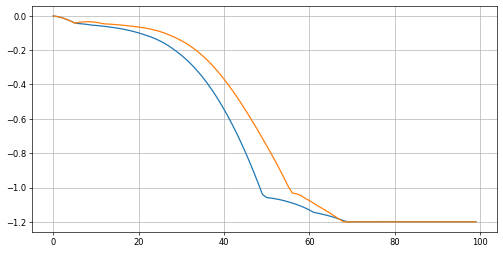

In [22]:
# mess with the actions here

actions = np.array([0,0,1,0,0,-1])
m_actions = mirror_act(actions)
state_hist = []
m_state_hist = []
action_hist = []
m_action_hist = []

env.reset()
for _ in range(100):
    obs, reward, done, _ = env.step(actions)
    state_hist.append(obs[0])
    env.render()
    #time.sleep(0.05)

env.reset()
for _ in range(100):
    obs, reward, done, _ = env.step(m_actions)
    m_state_hist.append(obs[0])
    env.render()
   # time.sleep(0.05)
f = plt.figure(0,dpi = 60,figsize = (10,5))
plt.plot(range(0,len(state_hist)),state_hist)
plt.plot(range(0,len(m_state_hist)),m_state_hist)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=10)  
plt.show()